<a href="https://colab.research.google.com/github/Pratikshinde99/Image_Recognition_ML/blob/main/An_AI_that_sees_IMAGE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# DAY 1 BOOTCAMP

# 📦 Install Kaggle API to download datasets directly from Kaggle
!pip install -q kaggle

In [50]:
# 📤 Upload your Kaggle API key (kaggle.json) from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pratiks99","key":"e0fef465bb409e4b7523e2bc768bed90"}'}

In [51]:
# 📁 Create Kaggle configuration folder in your Colab environment
!mkdir ~/.kaggle

# 📋 Move uploaded kaggle.json into Kaggle folder
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [52]:
# 🔒 Change file permissions so Kaggle API can read it securely
!chmod 600 ~/.kaggle/kaggle.json

In [53]:
# 📥 Download a dataset using KaggleHub (MNIST dataset here)
import kagglehub

# Download latest version of MNIST dataset from Kaggle
path = kagglehub.dataset_download("hojjatk/mnist-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [54]:
# 🖼 Load MNIST dataset from Keras (handwritten digits 0-9)
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display dataset shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [55]:
# 📏 Normalize pixel values to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

# ➡ Reshape images to (28, 28, 1) for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


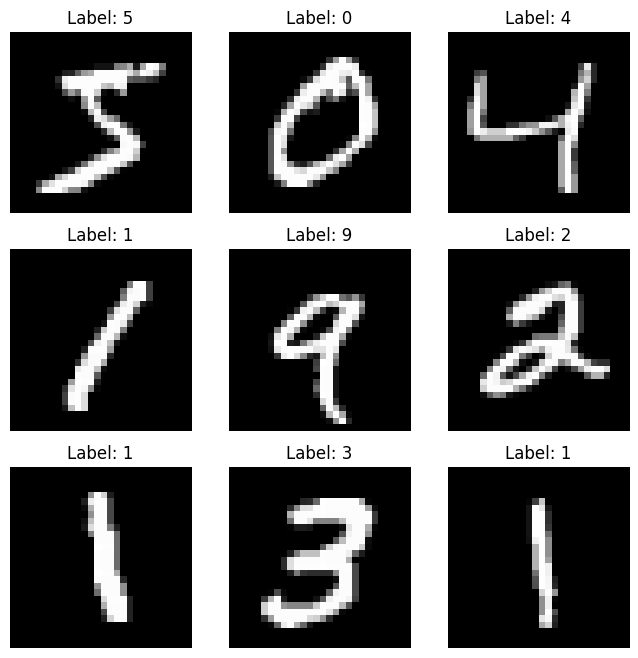

In [56]:
# 🖼 Visualize first 9 images from MNIST training set
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [57]:
# 📥 Load CIFAR-10 dataset from Keras (10 classes of small 32x32 color images)
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()

# 📏 Normalize pixel values to [0, 1] range
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0

# Display CIFAR-10 shapes
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

CIFAR-10 train shape: (50000, 32, 32, 3)


In [59]:
# Day 2 BOOTCAMP:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Building the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Correct spelling
    metrics=['accuracy']
)

# Printing model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# ⚠️ (In original code, 'model' was not defined before training — needs model definition first)
# Example: Train model on MNIST
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9048 - loss: 0.3250 - val_accuracy: 0.9846 - val_loss: 0.0510
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9877 - val_loss: 0.0401
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9886 - val_loss: 0.0413
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9900 - val_loss: 0.0359


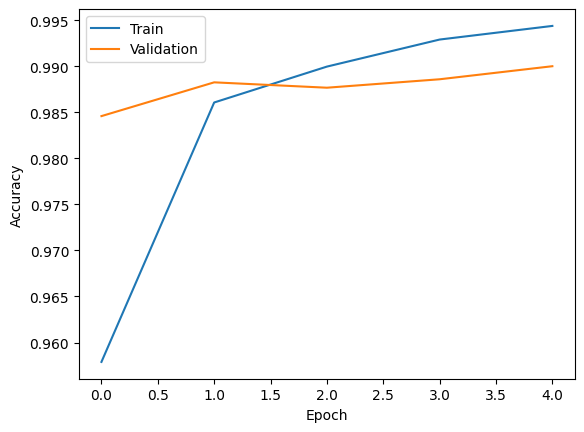

In [61]:
# 📈 Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
# 📊 Evaluate model performance on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy : {test_acc:.4f}")

# 🔮 Predict labels for test set
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0367
Test Accuracy : 0.9901
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
# 🏗 Define CNN architecture for MNIST classification
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# ⚙️ Compile model with Adam optimizer & categorical loss
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Fixed spelling
    metrics=['accuracy']
)

In [65]:
# DAY 3 BOOTCAMP

# 🔄 Data Augmentation for CIFAR-10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,         # Rotate images up to 15 degrees
    width_shift_range=0.1,     # Shift width by 10%
    height_shift_range=0.1,    # Shift height by 10%
    horizontal_flip=True       # Random horizontal flip
)

# Fit the augmentation generator on CIFAR-10 training set
datagen.fit(X_train_c10)

In [66]:
# 🏗 Build CNN model for CIFAR-10 classification
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# 1️⃣ Load CIFAR-10 dataset again
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = cifar10.load_data()

# 2️⃣ Normalize images
X_train_c10 = X_train_c10.astype('float32') / 255.0
X_test_c10 = X_test_c10.astype('float32') / 255.0

# 3️⃣ Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

# 4️⃣ Build CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 5️⃣ Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6️⃣ Train model with augmented data
model.fit(datagen.flow(X_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(X_test_c10, y_test_c10))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.3521 - loss: 1.7573 - val_accuracy: 0.5617 - val_loss: 1.2400
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5373 - loss: 1.3037 - val_accuracy: 0.5083 - val_loss: 1.3885
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5823 - loss: 1.1909 - val_accuracy: 0.6115 - val_loss: 1.1055
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6096 - loss: 1.1175 - val_accuracy: 0.6398 - val_loss: 1.0533
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6351 - loss: 1.0566 - val_accuracy: 0.6445 - val_loss: 1.0422
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6484 - loss: 1.0173 - val_accuracy: 0.6635 - val_loss: 0.9709
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6593 - loss: 0.9939 - val_accuracy: 0.6528 - val_loss: 1.0145
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6662 - loss: 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1000
           1       0.74      0.89      0.81      1000
           2       0.49      0.67      0.57      1000
           3       0.60      0.37      0.46      1000
           4       0.74      0.57      0.65      1000
           5       0.83      0.43      0.57      1000
           6       0.68      0.83      0.75      1000
           7       0.78      0.72      0.75      1000
           8       0.71      0.88      0.78      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



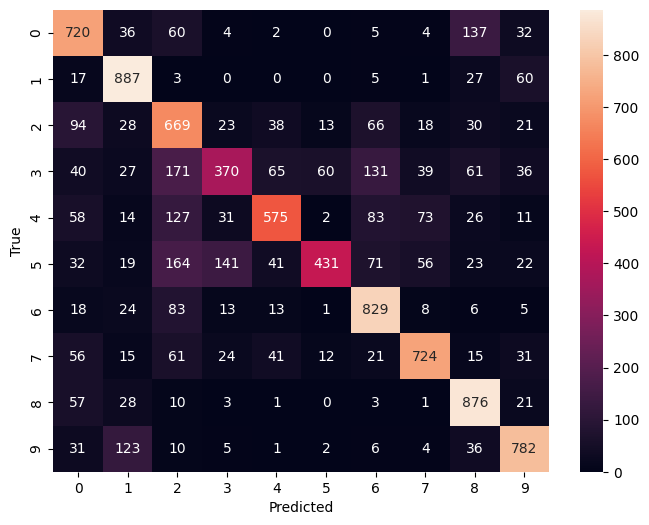

In [67]:
# 📊 Evaluate CIFAR-10 model with confusion matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Predict on test data
y_pred_c10 = model.predict(X_test_c10).argmax(axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_c10, y_pred_c10)

# Print classification report
print(classification_report(y_test_c10, y_pred_c10))

# 📊 Plot heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
# QUIZ CODE

# code menti.com
# 72676150


In [69]:
# DAY 4 BOOTCAMP
# 🐶🐱 Download Cats vs Dogs dataset from Kaggle
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
# 📦 Unzip the dataset
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [71]:
# 🔄 Prepare data generators for training & validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [72]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load pre-trained base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_generator, epochs=5, validation_data=val_generator)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 119ms/step - accuracy: 0.7742 - loss: 0.5664 - val_accuracy: 0.7985 - val_loss: 0.5122
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7995 - loss: 0.4964 - val_accuracy: 0.7985 - val_loss: 0.5098
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7952 - loss: 0.4950 - val_accuracy: 0.7985 - val_loss: 0.5149
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7963 - loss: 0.4757 - val_accuracy: 0.7980 - val_loss: 0.5175
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8027 - loss: 0.4530 - val_accuracy: 0.7985 - val_loss: 0.5276


In [73]:
import tensorflow as tf

# Unfreeze base model for fine-tuning
base_model.trainable = True

# Compile model with a very low learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(train_generator, epochs=3, validation_data=val_generator)


Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.7949 - loss: 0.4909 - val_accuracy: 0.7980 - val_loss: 0.5257
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.7973 - loss: 0.4568 - val_accuracy: 0.7980 - val_loss: 0.5278
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - accuracy: 0.8037 - loss: 0.4310 - val_accuracy: 0.7980 - val_loss: 0.5333


In [74]:
# ✅ Save the model
model.save('mobilenet_cats_dogs.h5')  # Corrected spelling

# ✅ Load the model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

# ✅ Optional: Test that the model loads correctly
loss, acc = loaded_model.evaluate(val_generator)
print(f"Loaded model accuracy: {acc:.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.7960 - loss: 0.5327
Loaded model accuracy: 0.80


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step


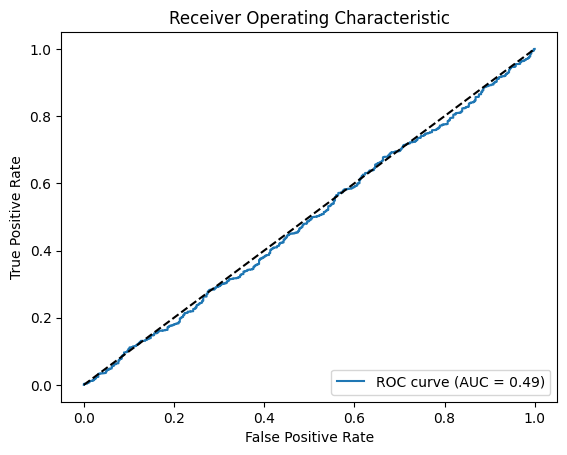

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ✅ Predict probabilities
y_pred_proba = loaded_model.predict(val_generator).ravel()  # Flatten to 1D

# ✅ Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ✅ Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [76]:
import tensorflow as tf

# Load the saved model (make sure the filename matches what you saved earlier)
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

from google.colab import files
uploaded = files.upload()  # Upload your file

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Get the uploaded filename automatically
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
prediction = loaded_model.predict(img_array)
print(f"Predicted class: {'Dog' if prediction[0][0] > 0.5 else 'Cat'} "
      f"({prediction[0][0]*100:.2f}% confidence for Dog)")

Saving MyCat.jpeg to MyCat (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Dog (82.94% confidence for Dog)


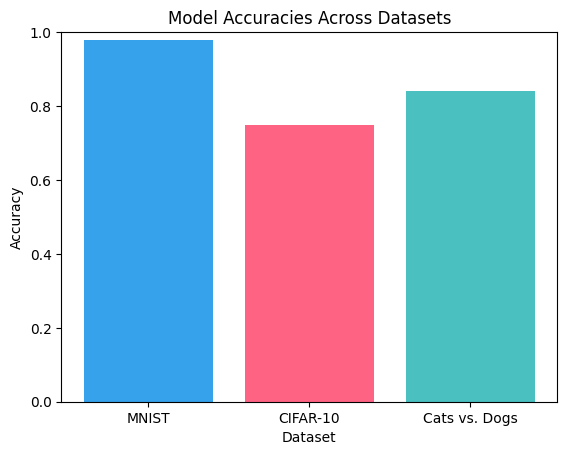

In [77]:
# 📊 Compare accuracies across datasets
import matplotlib.pyplot as plt

datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]  # Example accuracies

plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()